In [1]:
import numpy as np

from scipy.sparse.linalg import norm, spsolve, minres
from scipy.sparse import csc_matrix

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
A = csc_matrix(np.array([[2, 1, 1],
                   [1, 0, 1],
                   [1, 1, 2]]))


b =np.array([0,1,1])


x_unique = spsolve(A, b)
print(x_unique)

[ 0. -1.  1.]


In [3]:
# MINRES method
'''
def minres_method(A, b, max_iter=None, tol=1e-11):
    n = len(b)
    x = np.zeros(n)
    
    # Set default max_iter if not provided
    if max_iter is None:
        max_iter = 5 * n
        
    r = b - A @ x
    v = r / np.linalg.norm(r)
    
    w_old = np.zeros(n)
    w = np.zeros(n)
    
    beta = np.dot(r, v)
    
    residuals = [] 
    xk = []
    
    for i in range(max_iter):
        
        # Lanczos process
        v_new = A @ v - beta * w_old
        alpha = np.dot(v, v_new)
        v_new -= alpha * v
        
        beta_new = np.linalg.norm(v_new)
        if beta_new < tol:
            break
        
        w = v_new / beta_new
        
        
        # Givens rotation
        rho = np.sqrt(alpha**2 + beta_new**2)
        c = alpha / rho
        s = beta_new / rho
        
        # Update solution and residual
        x += (beta * c / rho) * v
        r -= (beta * c / rho) * (A @ v)
        
        # Prepare for next iteration
        w_old = v
        v = w
        beta = beta_new
        
        residuals.append(np.linalg.norm(r))
        xk.append(x.copy())
        
        if residuals[-1] < tol:
            print(f"Converged after {i+1} iterations")
            break
    
    if i == max_iter - 1:
        print("Did not converge within maximum iterations")
    
    return xk, residuals

xk, errors = minres_method(A, b, max_iter=5*b.shape[0], tol=1e-8)



print(len(errors))

'''

errors_minres = []

xk_minres = []

def callback(xk):
    rk = b - A.dot(xk).reshape(-1,1)
    error_norm = np.linalg.norm(rk)
    errors_minres.append(error_norm)
    xk_minres.append(xk)
    return error_norm

x_minres, info_minres = minres(A, b, tol=1e-11, callback=callback)
print(x_minres, info_minres)


[ 1.38777878e-17 -1.00000000e+00  1.00000000e+00] 0


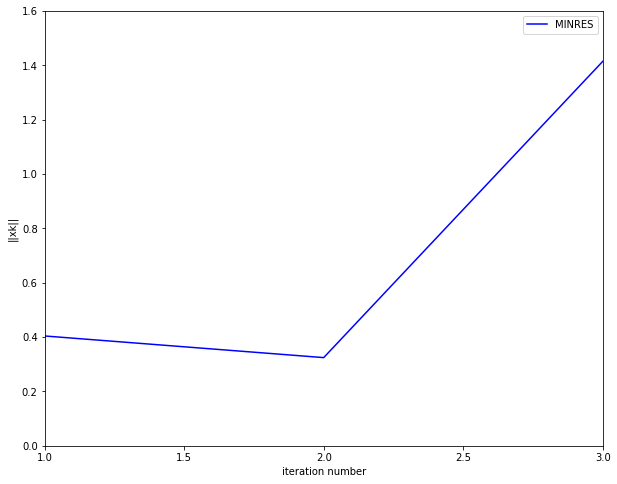

In [4]:
# Plot the ||x|| for the indefinite system

def plot_norm(minres_errors):
    # Create the plot
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.plot(range(1,len(minres_errors)+1), minres_errors, 'b-', label='MINRES')

    # Set labels and title
    ax.set_xlabel('iteration number')
    ax.set_ylabel('||xk||')
    #ax.set_title('Name:Cannizzo_sts4098, Dim:4098x4098, nnz:72356, id=39')

    # Set y-axis limits
    ax.set_xlim(1, 3)
    ax.set_ylim(0, 1.6)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

    # Add legend
    ax.legend()


    # Show the plot
    plt.show()
    
    

xk_minres_norm =  np.array([np.linalg.norm(xk) for xk in xk_minres])

# plot
plot_norm(xk_minres_norm)

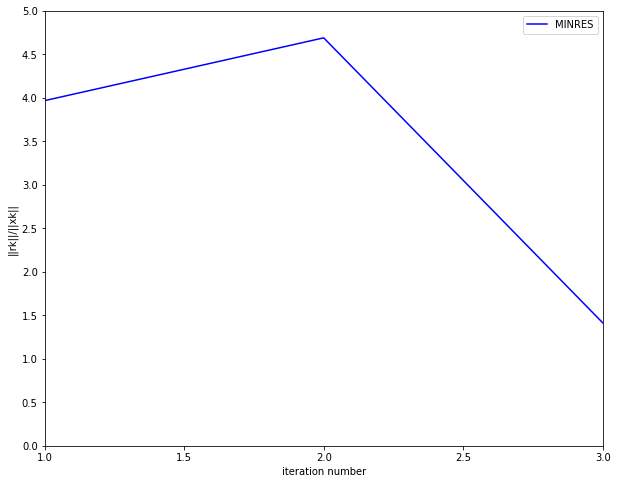

In [5]:
# Plot the ||rk||/||xk|| for the indefinite system

def plot_norm_2(minres_errors):
    # Create the plot
    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.plot(range(1,len(minres_errors)+1), minres_errors, 'b-', label='MINRES')

    # Set labels and title
    ax.set_xlabel('iteration number')
    ax.set_ylabel('||rk||/||xk||')
    #ax.set_title('Name:Cannizzo_sts4098, Dim:4098x4098, nnz:72356, id=39')

    # Set y-axis limits
    ax.set_xlim(1, 3)
    ax.set_ylim(0, 5)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

    # Add legend
    ax.legend()


    # Show the plot
    plt.show()
    
    
errors_minres_norm = np.array([np.linalg.norm(err) for err in errors_minres])
xk_minres_norm =  np.array([np.linalg.norm(xk) for xk in xk_minres])

minres_errors = errors_minres_norm / xk_minres_norm 


# plot
plot_norm_2(minres_errors)